# Time Series Forecasting Using LSTM

1. Univariate LSTM Models
    1. Data Preparation
    2. Vanilla LSTM
    3. Stacked LSTM
    4. Bidirectional LSTM
    5. CNN LSTM
    6. ConvLSTM
   
   
2. Multivariate LSTM Models
    1. Multiple Input Series.
    2. Multiple Parallel Series
    
    
3. Multi-Step LSTM Models
    1. Data Preparation
    2. Vector Output Model
    3. Encoder-Decoder Model
    
    
4. Multivariate Multi-Step LSTM Models
    1. Multiple Input Multi-Step Output.
    2. Multiple Parallel Input and Multi-Step Output.

## Univarite Forecasting on dummy dataset

1. Import all the dependencies
2. Prepare independent and dependent features
3. Reshape the data
4. Build and Compile the model
5. Train the model
6. Plot Training Loss 
7. Predicting For the next 10 data
8. Visualizaing The Output

### 1. Import all the dependencies

In [1]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd

import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### 2. preparing independent and dependent features

In [2]:
# https://justpaste.it/99hos

def prepare_data(timeseries_data, n_features):

    
    X, y =[],[]
    
    for i in range(len(timeseries_data)):
        
        # find the end of this pattern
        end_ix = i + n_features
        
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X) # x independent variable

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [5]:
print(y) # y dependent variable

[146 158 172 187 196 210]


In [6]:
X.shape

(6, 3)

### 3.  Reshape the data

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### 4. Build and Compile the model

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


### 5. Train the model

In [10]:
EPOCHS = 300

# fit model
H = model.fit(X, y, epochs=EPOCHS, verbose=1)

Epoch 1/300
1/1 [==============================] - 11s 11s/step - loss: 35763.4219
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 34568.1016
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 33591.3047
Epoch 4/300
1/1 [==============================] - 0s 20ms/step - loss: 32894.9375
Epoch 5/300
1/1 [==============================] - 0s 27ms/step - loss: 32448.1582
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 32119.9785
Epoch 7/300
1/1 [==============================] - 0s 29ms/step - loss: 31831.9219
Epoch 8/300
1/1 [==============================] - 0s 20ms/step - loss: 31543.4395
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 31232.4062
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 30881.3203
Epoch 11/300
1/1 [==============================] - 0s 23ms/step - loss: 30468.6816
Epoch 12/300
1/1 [==============================] - 0s 23ms/step - loss: 29970.4609
E

### 6. Plot Training Loss 

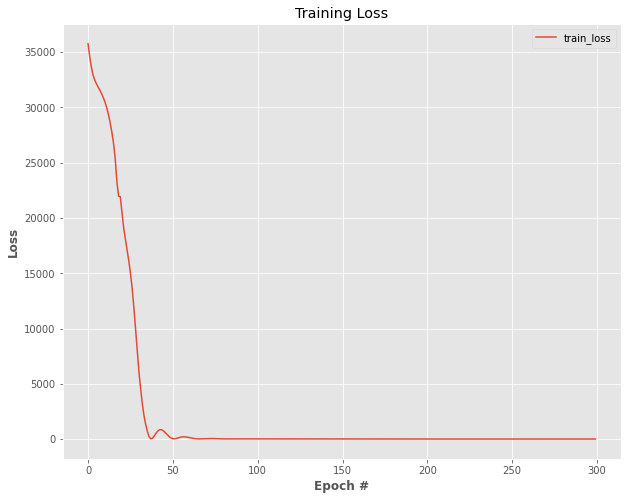

In [11]:
# plot the training  loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

### 7. Predicting For the next 10 data

In [12]:
# demonstrate prediction for next 10 days

x_input = np.array([187, 196, 210], dtype="float32")
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        
        x_input=array(temp_input[1:])
        
        print("--"*25)
        print("{} - day input: {}".format(i,x_input))

        x_input = x_input.reshape((1, n_steps, n_features))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output: {}".format(i,yhat[0]))
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]

        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print()
print("FINAL OUTPUT FOR 10 DAYS..")
print(lst_output)

[223.8473]
--------------------------------------------------
1 - day input: [196.     210.     223.8473]
1 - day output: [235.03235]
--------------------------------------------------
2 - day input: [210.      223.8473  235.03235]
2 - day output: [248.43024]
--------------------------------------------------
3 - day input: [223.8473  235.03235 248.43024]
3 - day output: [261.91055]
--------------------------------------------------
4 - day input: [235.03235 248.43024 261.91055]
4 - day output: [274.5718]
--------------------------------------------------
5 - day input: [248.43024 261.91055 274.5718 ]
5 - day output: [288.2797]
--------------------------------------------------
6 - day input: [261.91055 274.5718  288.2797 ]
6 - day output: [302.26273]
--------------------------------------------------
7 - day input: [274.5718  288.2797  302.26273]
7 - day output: [316.2116]
--------------------------------------------------
8 - day input: [288.2797  302.26273 316.2116 ]
8 - day output:

### 8. Visualizaing The Output

In [13]:
timeseries_data # original input time series data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
lst_output # our prediction

[223.8473,
 235.03235,
 248.43024,
 261.91055,
 274.5718,
 288.2797,
 302.26273,
 316.2116,
 330.8052,
 345.79602]

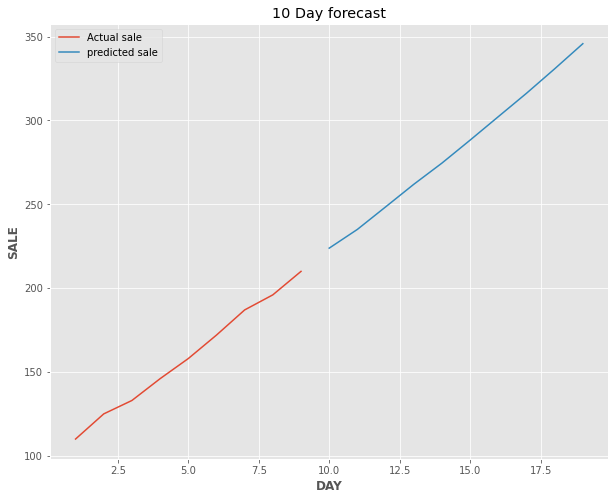

In [15]:
day_new=np.arange(1,10) # create day for time series data
day_pred=np.arange(10,20) # create day for predicted data

# plot both 
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,timeseries_data, label="Actual sale")
plt.plot(day_pred,lst_output, label="predicted sale")
plt.title("10 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("SALE", weight="bold")
plt.legend()
plt.show()

## Stock Prediction and Forecasting Using Stacked LSTM

1. Import Data and Dependencies
2. Perform Feature Scaling
3. Preprocess the Data in Train and Test splits
4. Prepare independent and dependent features
5. Reshape the data
6. Build and Compile the model
7. Train the model
8. Plot Training and Validation Loss
9. Predicting For the next 30 data
10. Visualizaing The Output

###  1. Import Data and Dependencies

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import os 
os.chdir("/content/drive/MyDrive/PGAA08_Deep_Learning/Code Files/13. Stock Prediction using LSTM")

In [18]:
df = pd.read_csv('Apple Stocks Prise.csv') 

In [19]:
df.shape # check the shape of the data

(1258, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [21]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


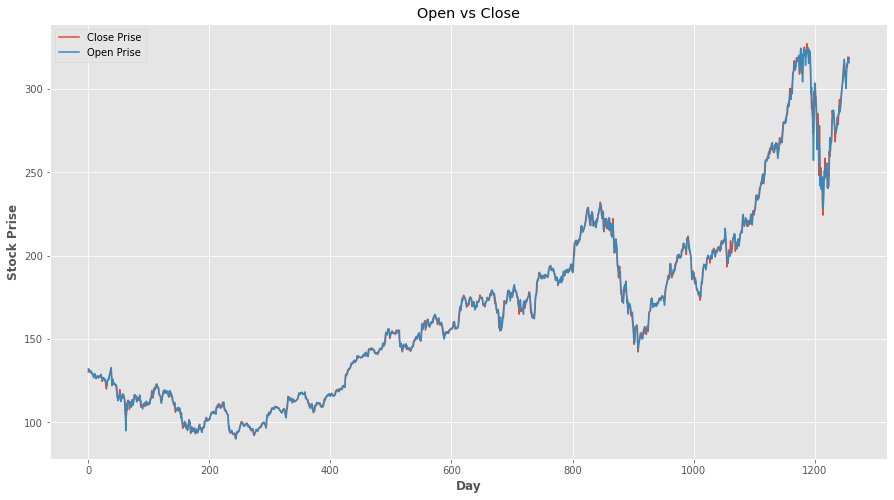

In [22]:
# plot both close prise and open prise for stocks   (https://justpaste.it/6paq4)

plt.style.use("ggplot")
plt.figure(figsize = [15,8])
plt.plot(df["close"], label="Close Prise")
plt.plot(df["open"], label="Open Prise")
plt.title("Open vs Close")
plt.xlabel("Day", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

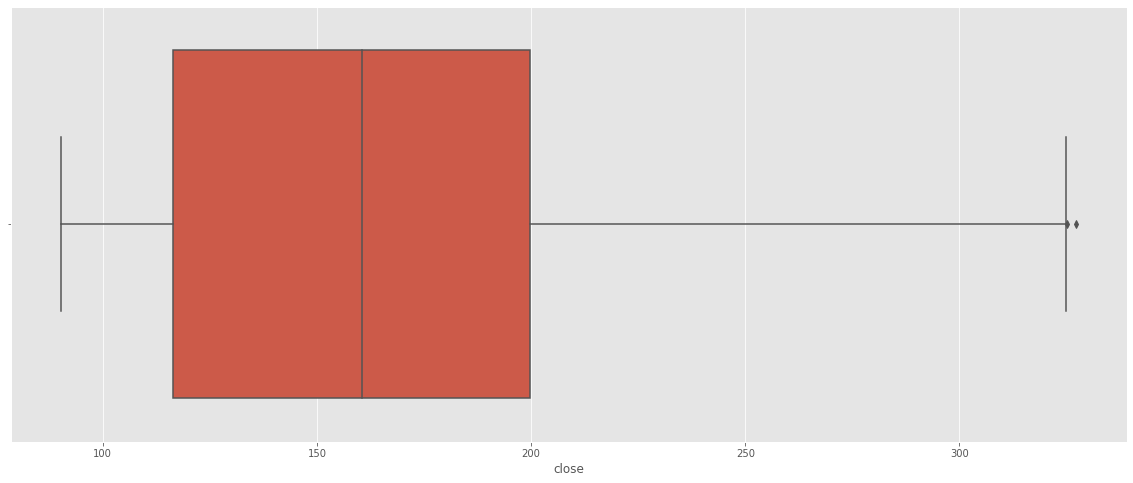

In [23]:
# check the outlier for close prise
plt.figure(figsize=(20,8))
sns.boxplot(df['close'])

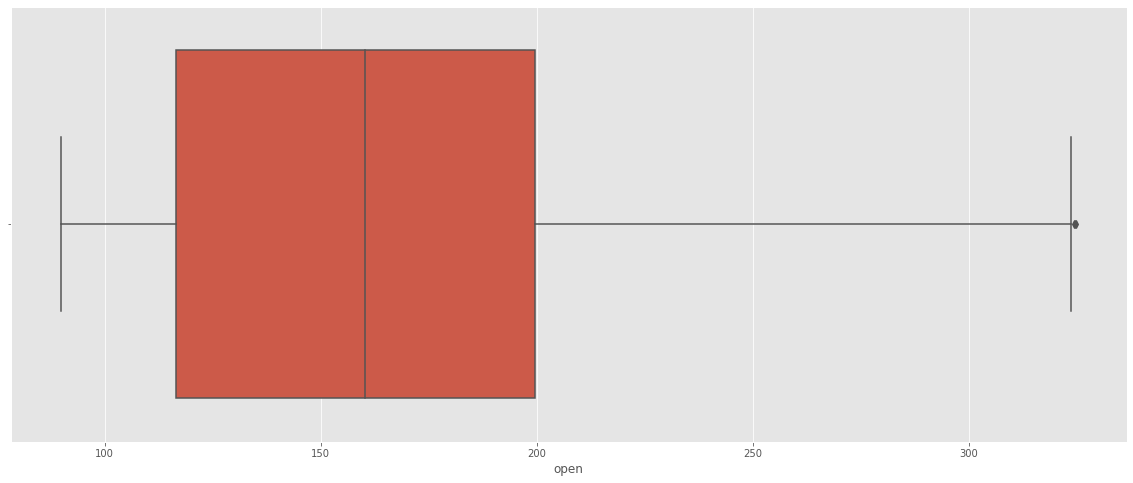

In [24]:
# check the outlier for open prise 
plt.figure(figsize=(20,8))
sns.boxplot(df['open'])

In [25]:
# " Close/Last" 

# " Open"


# $526.5


def remove(num):
    """
    obj: This function is used to remove dollor sign
    input:
        num: string data which contation dollor sign
    Retruns: float value of string data 
    """
    num = str(num).strip()
    a = float(num[1:])

    return a

### 3. Perform Feature Scaling

In [27]:
# we will select the close prise variable for time series forecasting 
Close = df["close"]
Close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [28]:
# transform values in the range of 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
Close_scaled =scaler.fit_transform(np.array(Close).reshape(-1,1))
Close_scaled

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

### 3. Preprocess the Data in Train and Test splits

In [29]:
a = int(len(Close_scaled)*0.80)
a

1006

In [30]:
len(Close_scaled)-a

252

In [31]:
len(Close_scaled)

1258

In [32]:
# select 80% as train size and remaining 20% as test data
training_size=int(len(Close_scaled)*0.80)
test_size=len(Close_scaled)-training_size

train_data = Close_scaled[0:training_size,   :]  # [0:1006, :]

test_data = Close_scaled[training_size:len(Close_scaled),:1]  # [1006;1258, :1]

In [33]:
print("Training Size: ", training_size)
print("Testing Size: ", test_size)

Training Size:  1006
Testing Size:  252


In [34]:
print("sample from train: ", train_data[:10])
print()
print("sample from test: ", test_data[:10])

sample from train:  [[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]]

sample from test:  [[0.37418728]
 [0.37106308]
 [0.36747446]
 [0.37135861]
 [0.35772186]
 [0.35024909]
 [0.37701596]
 [0.38925948]
 [0.40057418]
 [0.42138816]]


### 4. Prepare independent and dependent features

In [35]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(905, 100)
(905,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

### 5. Reshape the data

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
X_train.shape, X_test.shape

((905, 100, 1), (151, 100, 1))

### 6. Build and Compile the model

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


### 7. Train the model

In [47]:
EPOCHS = 300
H = model.fit(X_train,
          y_train,
          validation_data=(X_test,ytest),
          epochs=EPOCHS,
          batch_size=64,
          verbose=1)

Epoch 1/300
15/15 [==============================] - 10s 116ms/step - loss: 0.0226 - val_loss: 0.1261
Epoch 2/300
15/15 [==============================] - 0s 23ms/step - loss: 0.0046 - val_loss: 0.0345
Epoch 3/300
15/15 [==============================] - 0s 20ms/step - loss: 0.0020 - val_loss: 0.0212
Epoch 4/300
15/15 [==============================] - 0s 23ms/step - loss: 0.0015 - val_loss: 0.0213
Epoch 5/300
15/15 [==============================] - 0s 33ms/step - loss: 0.0014 - val_loss: 0.0150
Epoch 6/300
15/15 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0124
Epoch 7/300
15/15 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0178
Epoch 8/300
15/15 [==============================] - 0s 20ms/step - loss: 0.0012 - val_loss: 0.0183
Epoch 9/300
15/15 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0103
Epoch 10/300
15/15 [==============================] - 0s 19ms/step - loss: 9.9348e-04 - val_loss: 

### 8. Plot Training and Validation Loss

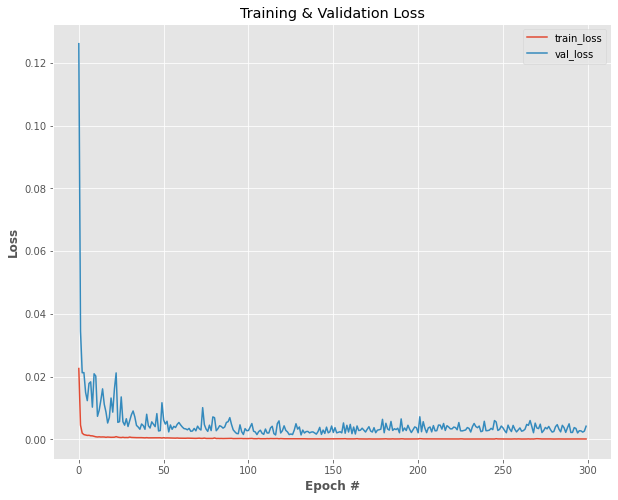

In [48]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [49]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 7ms/step


In [50]:
train_predict[0]

array([0.08752261], dtype=float32)

In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
train_predict[0]

array([111.0706], dtype=float32)

In [54]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

269.9440920246904

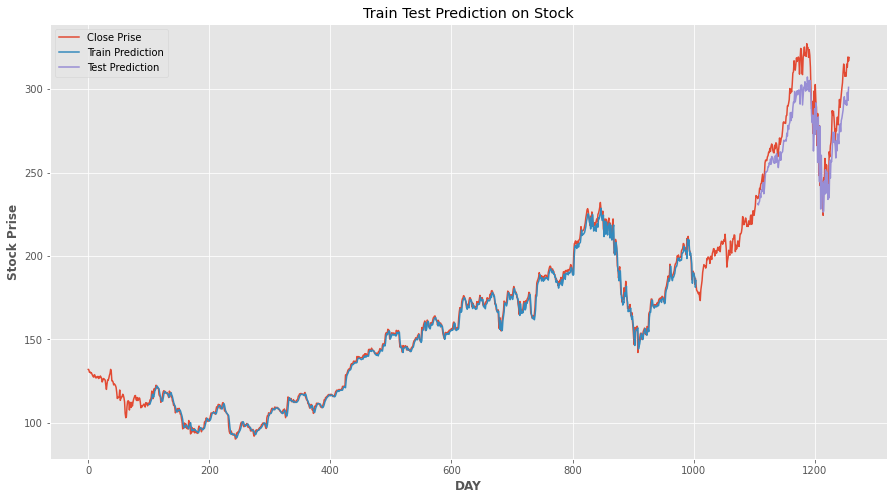

In [56]:
# shift train predictions for plotting
import numpy 
plt.style.use("ggplot")
plt.figure(figsize = [15,8])

# plot actual stock prise
plt.plot(df["close"], label="Close Prise")

# plot predicted train prise 
look_back=100
trainPredictPlot = numpy.empty_like(Close_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(trainPredictPlot, label="Train Prediction")

# plot predicted test prise
testPredictPlot = numpy.empty_like(Close_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Close_scaled)-1, :] = test_predict
plt.plot(testPredictPlot, label="Test Prediction")

plt.title("Train Test Prediction on Stock")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

### 9. Predicting For the next 30 data

In [58]:
len(test_data)

252

In [60]:
252-100

152

In [67]:
test_data[152:].reshape(1,-1)

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [59]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
print("temp input sample: ", temp_input[:10])

temp input sample:  [0.8583551465000423, 0.8866418981676942, 0.8743139407244789, 0.8843198513890065, 0.8783669678290975, 0.8986321033521913, 0.925821160179009, 0.9287764924427933, 0.9567677108840666, 0.9386979650426415]


In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("--"*25)
        print("{} - day input : {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output:  {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print()    
print("FINAL 30 DAY OUTPUT")
print(lst_output)

### 10. Visualizaing The Output

In [64]:
len(Close_scaled)

1258

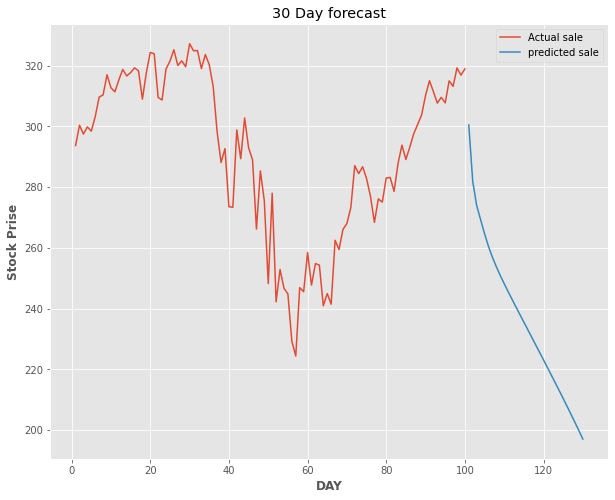

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)



plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,scaler.inverse_transform(Close_scaled[1158:]) , label="Actual sale")
plt.plot(day_pred,scaler.inverse_transform(lst_output), label="predicted sale")
plt.title("30 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

# THE END